In [1]:
# Import the dependencies
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

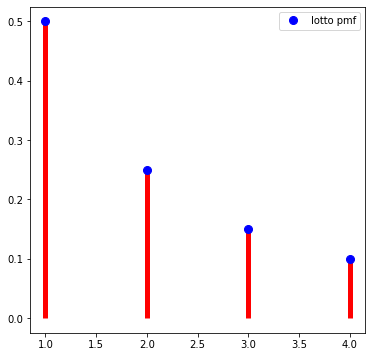

In [2]:
# For each number, we calculate the probability that pull it from the jar by dividing
numbers = range(1, 5)
counts = [50, 25, 15, 10]

# calculate the probs by dividing each count by the total number of balls.
probs = [count/sum(counts) for count in counts]

lotto_dict = {number: prob for number, prob in zip(numbers, probs)}
lotto_dict

# Plotting the discrete distribution with bar chart
x = list(lotto_dict.keys())
y = list(lotto_dict.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y, 'bo', ms=8, label='lotto pmf')
ax.vlines(x, 0, y, 'r', lw=5)
ax.legend(loc='best')
plt.savefig('images/discrete_distribution.png')

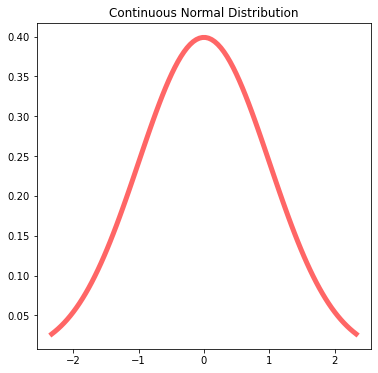

In [12]:
# Distribution with zero mean
mean = 0

# Calculate the percentile for x axis using stats.norm.ppf()
z_curve = np.linspace(stats.norm(mean, 1).ppf(0.01),
             stats.norm(mean, 1).ppf(0.99), 100)

# Calculate the density valuesusing stats.norm.pdf() for every percentile position
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(z_curve, stats.norm(mean, 1).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='normal pdf')

ax.set_title("Continuous Normal Distribution")
plt.savefig('images/normal_pdf.png')

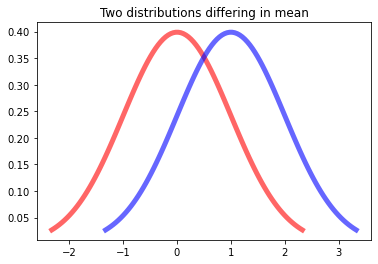

In [3]:
# Plotting the prabability density funciton for continous data
fig, ax = plt.subplots()

# Distribution with zero mean
mean = 0

# Calculate the percentile for x axis using stats.norm.ppf()
z_curve = np.linspace(stats.norm(mean, 1).ppf(0.01),
             stats.norm(mean, 1).ppf(0.99), 100)

# Calculate the density valuesusing stats.norm.pdf() for every percentile position
# Plot the distribution in red
ax.plot(z_curve, stats.norm(mean, 1).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve')

# Distribution with mean value = 1
mean = 1

# Calculate the percentiel for x axis using stats.norm.ppf()
z_curve = np.linspace(stats.norm(mean, 1).ppf(0.01),
             stats.norm(mean, 1).ppf(0.99), 100)

# Calculate the density values using stats.norm.pdf() for every percentile position
# Plot the distribution in blue
ax.plot(z_curve, stats.norm(mean, 1).pdf(z_curve),
     'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in mean")
plt.savefig('images/normal_different_mean.png')

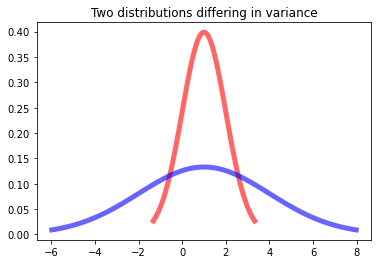

In [4]:
# Create 2 normal distributions with same mean, but different sigma
fig, ax = plt.subplots()

mean = 1
var = 1
z_curve = np.linspace(stats.norm(mean, var).ppf(0.01),
             stats.norm(mean, var).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean, var).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
var = 3
z_curve = np.linspace(stats.norm(mean, var).ppf(0.01),
             stats.norm(mean, var).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean, var).pdf(z_curve),
     'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in variance")
plt.savefig('images/normal_different_variance.png')

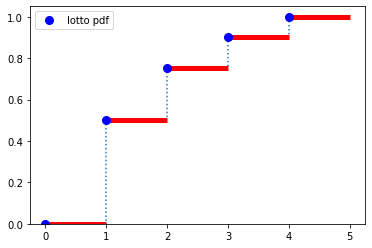

In [5]:
# align the values
lotto_dict = {0:0, 1:50, 2:25, 3:15, 4:10}
values = list(lotto_dict.keys())

# count the number of values that are less than
# or equal to the current value
count_less_than_equal = np.cumsum(list(lotto_dict.values()))

# divide by total number of values
prob_less_than_or_equal = count_less_than_equal/sum(lotto_dict.values()) 

# Create the step function to show the CDF
fig, ax = plt.subplots()
ax.plot(values, prob_less_than_or_equal, 'bo', ms=8, label='lotto pdf')
for i in range(0, 5):
    ax.hlines(prob_less_than_or_equal[i], i,i+1, 'r', lw=5,)
for i in range(0, 4):
    ax.vlines(i+1, prob_less_than_or_equal[i+1],
              prob_less_than_or_equal[i], linestyles='dotted')
ax.legend(loc='best' )
ax.set_ylim(0)
plt.savefig('images/discrete_cdf.png')

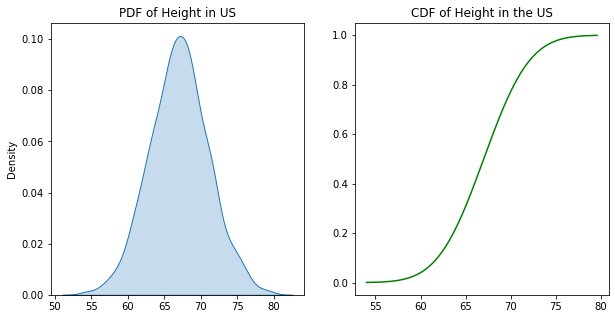

In [6]:
# Create a simulate dataset with mean = 67, sigma = 4, and N = 1000
r = sorted(stats.norm.rvs(loc=67, scale=4, size=1000))

# Calculate the CDF using stats.norm.cdf()
r_cdf = stats.norm.cdf(r, loc=67, scale=4)

# Plot the PDF and CDF side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(r, ax=ax1, shade=True)
ax1.set_title('PDF of Height in US')

ax2.plot(r, r_cdf, color='g')
ax2.set_title('CDF of Height in the US')
plt.savefig('images/continuous_cdf.png')

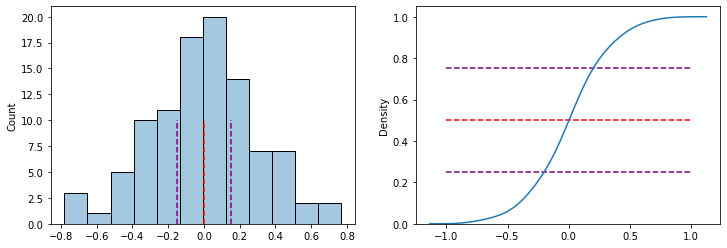

In [7]:
# First let's define some data
domain_x = np.linspace(-1,1,100)
norm_dist = stats.norm.rvs(0,0.3,domain_x.shape)
norm_dist.shape

# Create the figure frame
f,(ax_pdf,ax_cdf) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

###### Histogram (PDF)
ax_pdf = sns.histplot(x=norm_dist, ax=ax_pdf, alpha=0.4)
# You can also see the PDF if you want
# ax_pdf = sns.kdeplot(x=out, cumulative=False, ax=ax_pdf)

# Median line
ax_pdf.vlines(
    x=np.median(norm_dist),
    ymin=0,
    ymax=10,
    linestyles='--',
    color='red'      
)
# 25th-percentile line
ax_pdf.vlines(
    x=np.quantile(norm_dist, 0.25),
    ymin=0,
    ymax=10,
    linestyles='--',
    color='purple'      
)
# 75th-percentile line
ax_pdf.vlines(
    x=np.quantile(norm_dist, 0.75),
    ymin=0,
    ymax=10,
    linestyles='--',
    color='purple'      
)

###### CDF 
ax_cdf = sns.kdeplot(x=norm_dist, cumulative=True, ax=ax_cdf)

# Median line
ax_cdf.hlines(
    y=0.5,
    xmin=-1,
    xmax=1,
    linestyles='--',
    color='red'
)
# 25th-percentile line
ax_cdf.hlines(
    y=0.25,
    xmin=-1,
    xmax=1,
    linestyles='--',
    color='purple'
)
# 75th-percentile line
ax_cdf.hlines(
    y=0.75,
    xmin=-1,
    xmax=1,
    linestyles='--',
    color='purple'
)

plt.savefig('images/continuous_pdf_cdf.png')

The range of norm_dist: 
(-0.7799203949074043, 0.7668433937959593)

The range of norm_with_outliers: 
(-0.7799203949074043, 7.634810108054344)



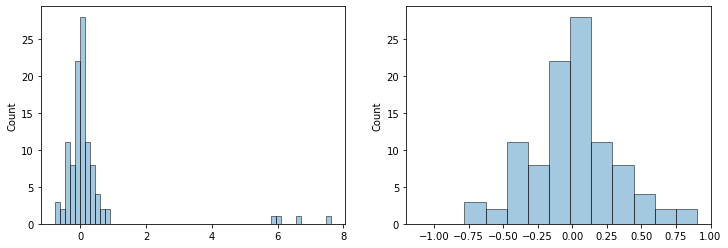

In [8]:
# Add an outlier
norm_with_outliers = np.append(norm_dist, 5*np.abs(np.random.randn(5)))
print(f'The range of norm_dist: \n{norm_dist.min(), norm_dist.max()}\n')
print(f'The range of norm_with_outliers: \n{norm_with_outliers.min(), norm_with_outliers.max()}\n')

# Create figure frame
f,(ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

# Showing the outliers
sns.histplot(x=norm_with_outliers, alpha=0.4, ax=ax0)

# Ignoring outliers
ax1=sns.histplot(x=norm_with_outliers, alpha=0.4, ax=ax1)
ax1.set_xlim(right=1.)

plt.savefig('images/continuous_pdf_outliers.png')

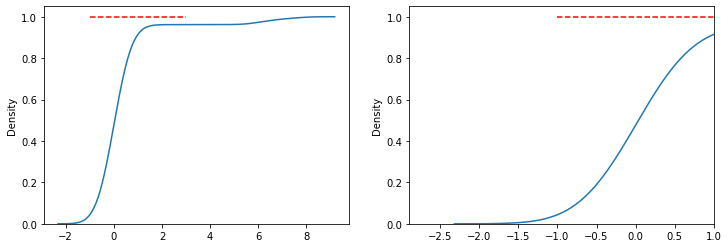

In [9]:
# Create figure frame
f,(ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

# Showing the outliers
ax0 = sns.kdeplot(x=norm_with_outliers, cumulative=True, ax=ax0)
ax0.hlines(1,xmin=-1,xmax=3,color='red',linestyles='--')

# Ignoring outliers
ax1 = sns.kdeplot(x=norm_with_outliers, cumulative=True, ax=ax1)
ax1.hlines(1,xmin=-1,xmax=1,color='red',linestyles='--')
ax1.set_xlim(right=1.)

plt.savefig('images/continuous_cdf_outliers.png')

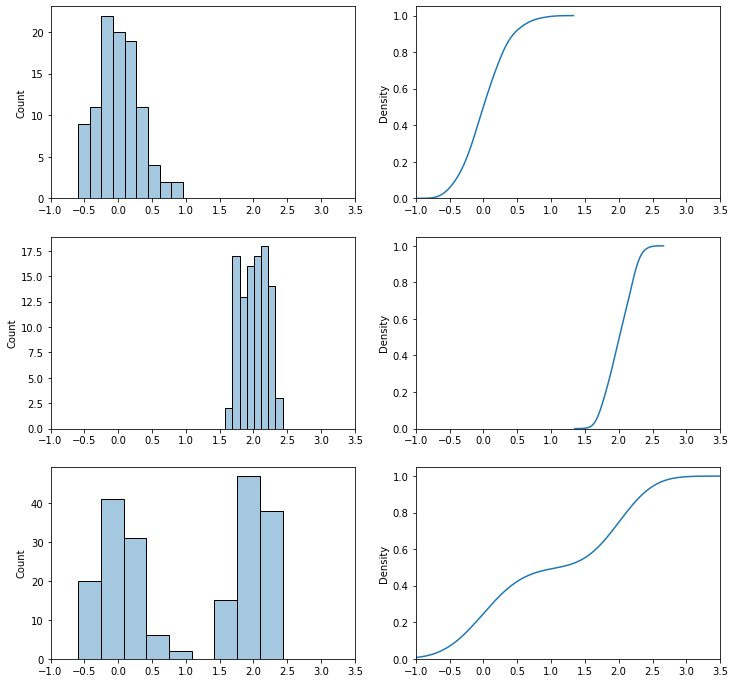

In [10]:
# Create two sets of simulated data follow normal distribution
domain_x = np.linspace(-1, 1, 100)
norm_dist0 = stats.norm.rvs(0,0.3, domain_x.shape)
norm_dist1 = stats.norm.rvs(2,0.2, domain_x.shape)

# Combine the two datasets into one
two_dist = np.append(norm_dist0, norm_dist1)

f,(ax0,ax1,ax2) = plt.subplots(3,2, figsize=(12,12))

# Histogram
ax=sns.histplot(x=norm_dist0, alpha=0.4, ax=ax0[0])
ax.set_xlim(-1,3.5)
ax=sns.histplot(x=norm_dist1, alpha=0.4, ax=ax1[0])
ax.set_xlim(-1,3.5)
ax=sns.histplot(x=two_dist, alpha=0.4, ax=ax2[0])
ax.set_xlim(-1,3.5)

# CDF
ax=sns.kdeplot(x=norm_dist0, alpha=0.4, ax=ax0[1], cumulative=True)
ax.set_xlim(-1,3.5)
ax=sns.kdeplot(x=norm_dist1, alpha=0.4, ax=ax1[1], cumulative=True)
ax.set_xlim(-1,3.5)
ax=sns.kdeplot(x=two_dist, alpha=0.4, ax=ax2[1], cumulative=True)
ax.set_xlim(-1,3.5)

plt.savefig('images/continuous_clusters.png')

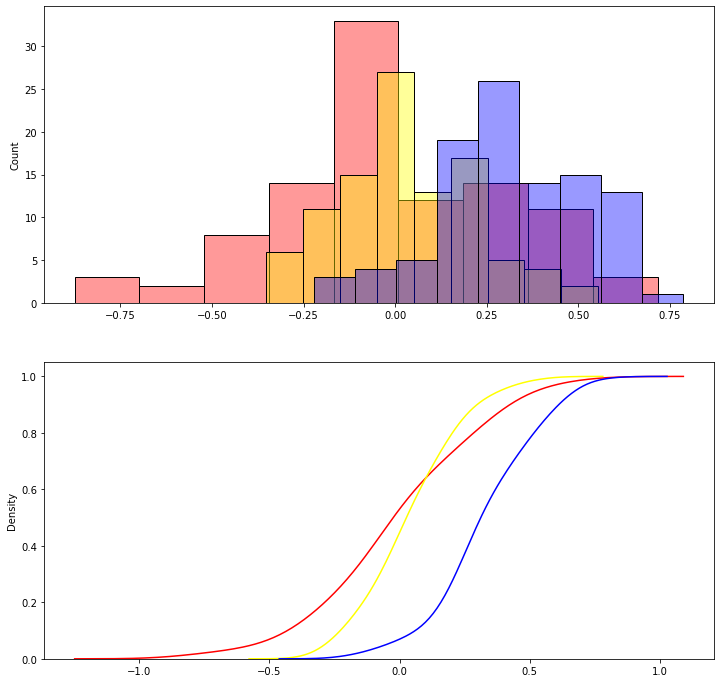

In [11]:
# Craete three datasets that follow normal distribution
norm_dist0 = stats.norm.rvs(0,0.3,domain_x.shape)
norm_dist1 = stats.norm.rvs(0,0.2,domain_x.shape)
norm_dist2 = stats.norm.rvs(0.3,0.2,domain_x.shape)

f,(ax0,ax1) = plt.subplots(2,1, figsize=(12,12))

# Histogram
ax=sns.histplot(x=norm_dist0, alpha=0.4, ax=ax0, color='red')
ax=sns.histplot(x=norm_dist1, alpha=0.4, ax=ax0, color='yellow')
ax=sns.histplot(x=norm_dist2, alpha=0.4, ax=ax0, color='blue')

# CDF
ax=sns.kdeplot(x=norm_dist0, alpha=0.4, ax=ax1, cumulative=True, color='red')
ax=sns.kdeplot(x=norm_dist1, alpha=0.4, ax=ax1, cumulative=True, color='yellow')
ax=sns.kdeplot(x=norm_dist2, alpha=0.4, ax=ax1, cumulative=True, color='blue')

plt.savefig('images/continuous_multiple_distributions.png')